In [88]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.utils import get_data

WORKING_DIR = Path.cwd().parent
FILE_PATH = Path(WORKING_DIR, "data", "raw", "MSCI_World_daily.csv")
FILE_PATH

WindowsPath('c:/dev/python/GitHub/msci/data/raw/MSCI_World_daily.csv')

In [89]:
data = pd.read_csv(FILE_PATH, sep=",", skiprows=[])
# data.index = pd.to_datetime(data.index)
# data = data.sort_index()
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD,^990100-USD-STRD
1,Date,NaN,NaN,NaN,NaN,NaN
2,1972-01-03,104.30000305175781,104.30000305175781,104.30000305175781,104.30000305175781,0
3,1972-01-04,104.5999984741211,104.5999984741211,104.5999984741211,104.5999984741211,0
4,1972-01-05,105.5999984741211,105.5999984741211,105.5999984741211,105.5999984741211,0


In [90]:
# CSV einlesen, Zeilen 1 und 2 überspringen, erste Spalte als Datums-Index
data = pd.read_csv(
    FILE_PATH, sep=",", skiprows=[1, 2], header=0, index_col=0, parse_dates=True
)
data.index.name = "Date"
data


,Close,High,Low,Open,Volume
Date,,,,,
1972-01-03,104.300003,104.300003,104.300003,104.300003,0
1972-01-04,104.599998,104.599998,104.599998,104.599998,0
1972-01-05,105.599998,105.599998,105.599998,105.599998,0
1972-01-06,110.800003,110.800003,110.800003,110.800003,0
1972-01-07,110.900002,110.900002,110.900002,110.900002,0
...,...,...,...,...,...
2025-06-30,4026.399902,4034.000000,4008.699951,4011.600098,0
2025-07-01,4021.600098,4031.000000,4011.000000,4030.300049,0
2025-07-02,4036.300049,4039.699951,4016.100098,4023.300049,0


In [91]:
data[data.index.year==2003]

,Close,High,Low,Open,Volume
Date,,,,,
2003-01-02,811.099976,811.099976,811.000000,811.000000,0
2003-01-03,814.500000,815.299988,810.299988,811.000000,0
2003-01-06,828.400024,828.400024,828.299988,828.299988,0
2003-01-07,821.299988,829.200012,818.700012,828.299988,0
2003-01-08,812.400024,821.500000,809.500000,821.299988,0
...,...,...,...,...,...
2003-12-25,1016.700012,1017.099976,1016.299988,1016.900024,0
2003-12-26,1017.299988,1019.700012,1016.599976,1016.700012,0
2003-12-29,1028.099976,1028.300049,1017.500000,1017.500000,0


In [98]:
# Kopie der Daten
df = data.copy()

# Stelle sicher, dass dein Index ein DatetimeIndex ist
df.index = pd.to_datetime(df.index)

# Hole den letzten Eintrag jedes Jahres
last = df.resample("YE").last()  # oder: df.groupby(df.index.year).last()

# Berechne die Jahresrendite auf Basis der Jahresendkurse
returns = last["Close"].pct_change().dropna()

# In DataFrame-Form mit Jahr als Index
returns = returns.to_frame(name="Return")
returns.index = returns.index.year  # Optional: Index nur aufs Jahr setzen
#drop 2025
returns = returns[returns.index < 2025]

returns


,Return
Date,
1973,-0.170620
1974,-0.278598
1975,0.290281
1976,0.103072
1977,-0.025157
1978,0.127189
1979,0.071954
1980,0.214340
1981,-0.079146


In [93]:
returns.describe()

,Return
count,52.000000
mean,0.081524
std,0.172105
min,-0.420200
25%,-0.025726
50%,0.126620
75%,0.202027
max,0.391033


In [94]:
# Definiere die Klassen (Bins) für die Renditen
bins = [-np.inf, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, np.inf]

# Erstelle eine neue Spalte mit der Klassenzuordnung
returns["ReturnCategory"] = pd.cut(returns["Return"], bins=bins, right=False)

# Definiere die Labels aus den Kategorien der ReturnCategory-Spalte
labels = returns["ReturnCategory"].cat.categories

# Erstelle das Dictionary: Bereich → Liste von (Jahr, Return)-Tupeln
return_dict = {}
for label in labels:
    years_and_returns = [(year, returns.loc[year, "Return"]) for year in returns[returns["ReturnCategory"] == label].index]
    return_dict[label] = years_and_returns

return_dict


{Interval(-inf, -0.5, closed='left'): [],
 Interval(-0.5, -0.4, closed='left'): [(2008,
   np.float64(-0.4202003488360556))],
 Interval(-0.4, -0.3, closed='left'): [],
 Interval(-0.3, -0.2, closed='left'): [(1974,
   np.float64(-0.27859782428533375)),
  (2002, np.float64(-0.21004880500450573))],
 Interval(-0.2, -0.1, closed='left'): [(1973,
   np.float64(-0.17061970882213706)),
  (1990, np.float64(-0.18649742652837764)),
  (2000, np.float64(-0.1343104635790301)),
  (2001, np.float64(-0.18347580334885016)),
  (2018, np.float64(-0.10439742124361184)),
  (2022, np.float64(-0.19463440588657155))],
 Interval(-0.1, 0.0, closed='left'): [(1977, np.float64(-0.02515725943381797)),
  (1981, np.float64(-0.07914567265238681)),
  (1992, np.float64(-0.07153533164751369)),
  (2011, np.float64(-0.07616592598978178)),
  (2015, np.float64(-0.027431656830547047))],
 Interval(0.0, 0.1, closed='left'): [(1979, np.float64(0.07195423411423496)),
  (1982, np.float64(0.0586629637563183)),
  (1984, np.float64(0

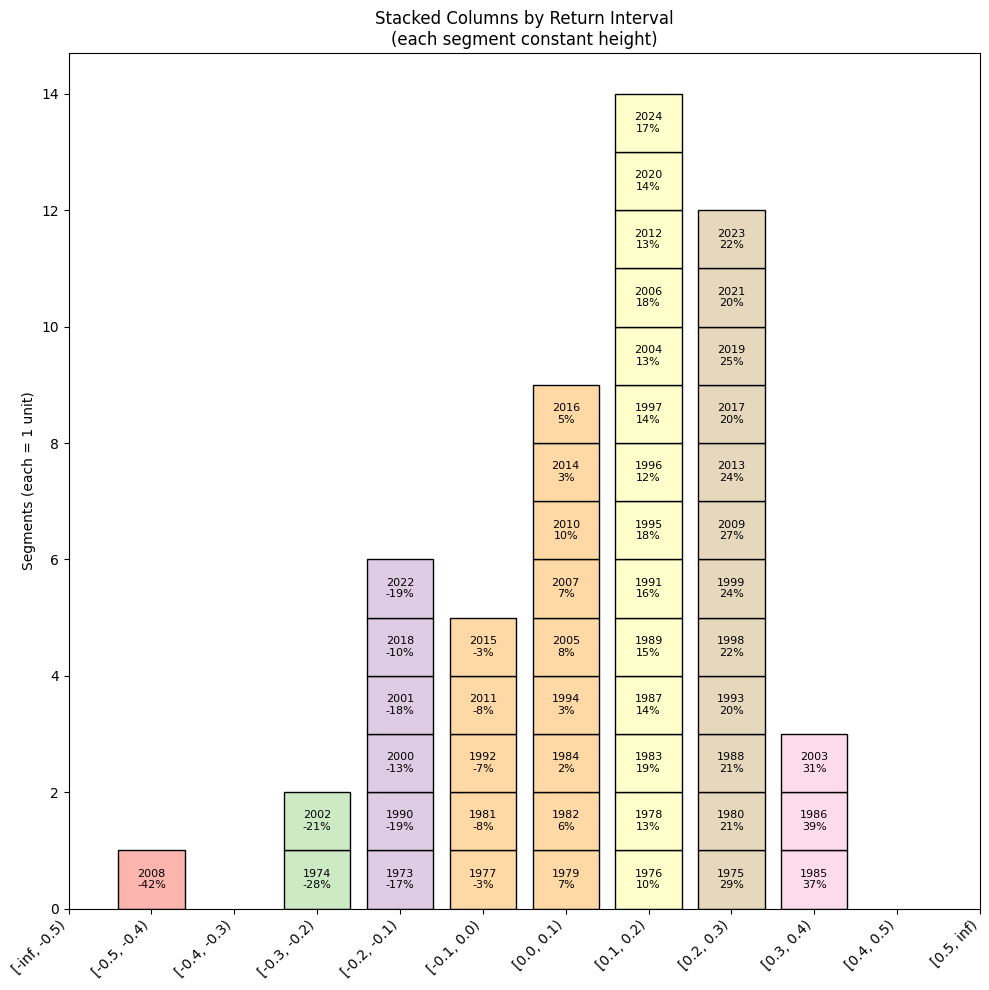

In [102]:
labels = list(return_dict.keys())
x_positions = range(len(labels))
x_colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))
segment_height = 1  # fixed height for every segment

fig, ax = plt.subplots(figsize=(10, 10))

for i, key in enumerate(labels):
    entries = return_dict[key]
    bottom = 0
    for year, ret in entries:
        ax.bar(i, segment_height, bottom=bottom, color=x_colors[i], edgecolor="black")
        ax.text(
            i,
            bottom + segment_height / 2,
            f"{year}\n{ret:.0%}",
            ha="center",
            va="center",
            fontsize=8,
        )
        bottom += segment_height

ax.set_xticks(list(x_positions))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel("Segments (each = 1 unit)")
ax.set_title("Stacked Columns by Return Interval\n(each segment constant height)")
plt.tight_layout()
plt.show()
